The goal of this project is to build a dashboard to find trend and insight of avocado price in the US. The first step is to use python to clean the data and observe the correlation of different attributes, then use Tableau to create a dashboard.

Dataset: avocado-updated-2020.csv  
Source: https://www.kaggle.com/timmate/avocado-prices-2020  
Records: 33045  
Attributes: 13  

Description of columns:  
`date` - The date of the observation  
`average_price` - The average price of a single avocado in USD  
`total_volume` - Total number of avocados sold  
`4046`, `4225`, `4770` - Total number of avocados sold group by Price Look-Up code (PLU)  
`total_bags`, `small_bags`, `large_bags`, `xlarge_bags`	- Weight of avocados in lb  
`type` - Conventional or Organic  
`year` - The year of the observation  
`geography` - The city or region of the observation  

# Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Load Data

In [2]:
file = "avocado-updated-2020.csv"
df = pd.read_csv(file)

In [3]:
# Dataset head and tail
df

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,2020-11-29,1.47,1583056.27,67544.48,97996.46,2617.17,1414878.10,906711.52,480191.83,27974.75,organic,2020,Total U.S.
33041,2020-11-29,0.91,5811114.22,1352877.53,589061.83,19741.90,3790665.29,2197611.02,1531530.14,61524.13,conventional,2020,West
33042,2020-11-29,1.48,289961.27,13273.75,19341.09,636.51,256709.92,122606.21,134103.71,0.00,organic,2020,West
33043,2020-11-29,0.67,822818.75,234688.01,80205.15,10543.63,497381.96,285764.11,210808.02,809.83,conventional,2020,West Tex/New Mexico


In [4]:
# Number of unique data of each column
df.nunique()

date               306
average_price      260
total_volume     32901
4046             31628
4225             32286
4770             20761
total_bags       32752
small_bags       31938
large_bags       28389
xlarge_bags      11760
type                 2
year                 6
geography           54
dtype: int64

In [5]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33045 entries, 0 to 33044
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           33045 non-null  object 
 1   average_price  33045 non-null  float64
 2   total_volume   33045 non-null  float64
 3   4046           33045 non-null  float64
 4   4225           33045 non-null  float64
 5   4770           33045 non-null  float64
 6   total_bags     33045 non-null  float64
 7   small_bags     33045 non-null  float64
 8   large_bags     33045 non-null  float64
 9   xlarge_bags    33045 non-null  float64
 10  type           33045 non-null  object 
 11  year           33045 non-null  int64  
 12  geography      33045 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 3.3+ MB


In [6]:
# Dataset summary
df.describe()

,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,year
count,33045.000000,3.304500e+04,3.304500e+04,3.304500e+04,3.304500e+04,3.304500e+04,3.304500e+04,3.304500e+04,3.304500e+04,33045.000000
mean,1.379941,9.683997e+05,3.023914e+05,2.797693e+05,2.148255e+04,3.646735e+05,2.501980e+05,1.067329e+05,7.742585e+03,2017.460887
std,0.378972,3.934533e+06,1.301026e+06,1.151052e+06,1.001607e+05,1.564004e+06,1.037734e+06,5.167226e+05,4.819803e+04,1.699747
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2015.000000
25%,1.100000,1.511895e+04,7.673100e+02,2.712470e+03,0.000000e+00,9.121860e+03,6.478630e+03,4.662900e+02,0.000000e+00,2016.000000
50%,1.350000,1.291170e+05,1.099477e+04,2.343600e+04,1.780900e+02,5.322224e+04,3.687699e+04,6.375860e+03,0.000000e+00,2017.000000
75%,1.620000,5.058285e+05,1.190219e+05,1.352389e+05,5.096530e+03,1.744314e+05,1.206624e+05,4.041723e+04,8.044400e+02,2019.000000
max,3.250000,6.371614e+07,2.274362e+07,2.047057e+07,2.546439e+06,3.168919e+07,2.055041e+07,1.332760e+07,1.403184e+06,2020.000000


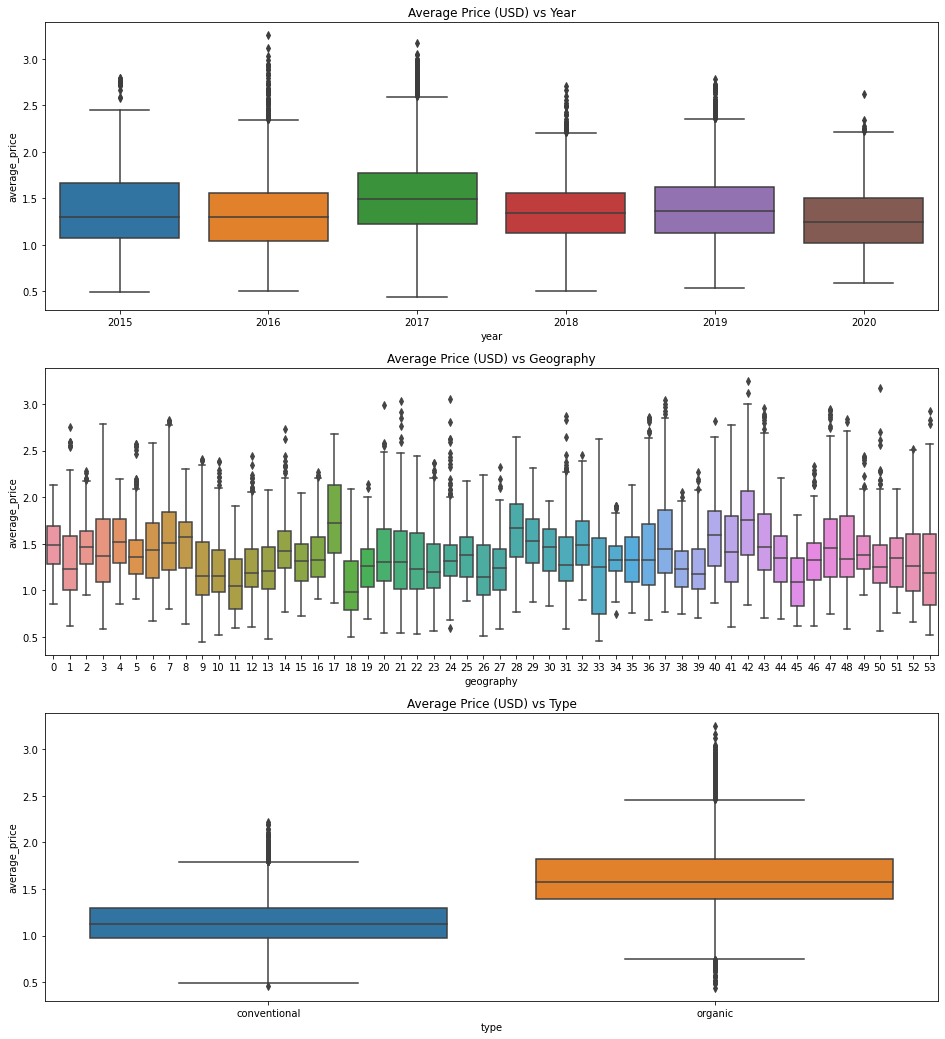

In [7]:
# Check for outliers
fig = plt.figure(figsize=(16, 18))

plt.subplot(3, 1, 1)
sns.boxplot(x="year", y="average_price", data=df)
plt.title("Average Price (USD) vs Year")

plt.subplot(3, 1, 2)
sns.boxplot(x="geography", y="average_price", data=df)
geography = df["geography"].nunique()
plt.xticks(range(geography), range(geography))
plt.title("Average Price (USD) vs Geography")

plt.subplot(3, 1, 3)
sns.boxplot(x="type", y="average_price", data=df)
plt.title("Average Price (USD) vs Type")

plt.show()

No unwanted outlier was found

# Data Cleaning

In [8]:
# Check number of missing data under "total_bags"
missing = df["total_bags"][df["total_bags"] == 0]
print("Missing data: {}\nMissing data percentage: {:.2f}%".format(len(missing), len(missing)/len(df)*100))

Missing data: 15
Missing data percentage: 0.05%


In [9]:
# It is acceptable to remove the missing data since it is only 0.05% of the total observation
df.drop(missing.index, inplace=True)

In [10]:
# Convert "date" to date
df["date"] = pd.to_datetime(df["date"])

In [11]:
# Convert "total_volume", "4046", "4225", "4770" to integer
col = ["total_volume", "4046", "4225", "4770"]
df[col] = np.transpose([list(map(int, df[i])) for i in col])

# New Features

In [12]:
# Extract month from "date"
df["month"] = df["date"].dt.month

# Other kinds of avocados
df["other_plu"] = df["total_volume"] - df["4046"] - df["4225"] - df["4770"]

In [13]:
# Clean data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33030 entries, 0 to 33044
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           33030 non-null  datetime64[ns]
 1   average_price  33030 non-null  float64       
 2   total_volume   33030 non-null  int64         
 3   4046           33030 non-null  int64         
 4   4225           33030 non-null  int64         
 5   4770           33030 non-null  int64         
 6   total_bags     33030 non-null  float64       
 7   small_bags     33030 non-null  float64       
 8   large_bags     33030 non-null  float64       
 9   xlarge_bags    33030 non-null  float64       
 10  type           33030 non-null  object        
 11  year           33030 non-null  int64         
 12  geography      33030 non-null  object        
 13  month          33030 non-null  int64         
 14  other_plu      33030 non-null  int64         
dtypes: datetime64[ns](1

In [14]:
df.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,month,other_plu
0,2015-01-04,1.22,40873,2819,28287,49,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,1,9718
1,2015-01-04,1.79,1373,57,153,0,1162.65,1162.65,0.00,0.0,organic,2015,Albany,1,1163
2,2015-01-04,1.00,435021,364302,23821,82,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,1,46816
3,2015-01-04,1.76,3846,1500,938,0,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta,1,1408
4,2015-01-04,1.08,788025,53987,552906,39995,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington,1,141137


# Export Data

In [15]:
# Export new dataset to csv
df.to_csv("avocado_price_2020.csv")

# Visualisation

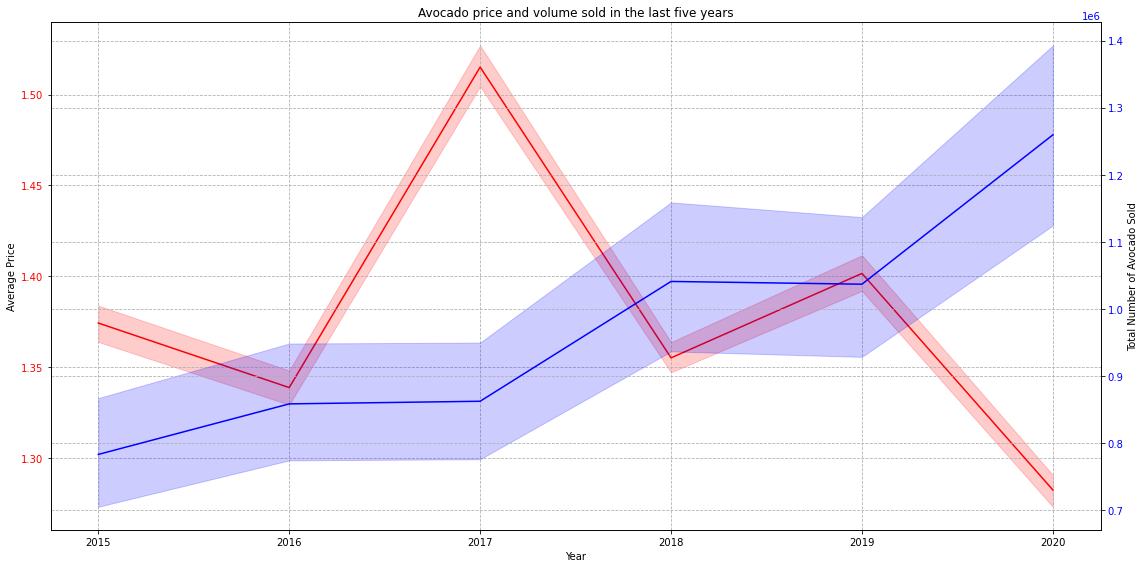

In [16]:
## Trend of avocado price and volume sold in the last five years

fig, ax1 = plt.subplots(figsize=(16, 8))

# Sub-plot 1
sns.lineplot(x="year", y="average_price", data=df, color="red", ax=ax1)
ax1.set_xlabel("Year")
ax1.set_ylabel("Average Price")
ax1.set_title("Avocado price and volume sold in the last five years")
ax1.tick_params(axis="y", labelcolor="red")
ax1.grid(which="major", axis="both", linestyle="--")

# Sub-plot 2
ax2 = ax1.twinx() # Share same x-axis

sns.lineplot(x="year", y="total_volume", data=df, color="blue", ax=ax2)
ax2.set_ylabel("Total Number of Avocado Sold")
ax2.tick_params(axis="y", labelcolor="blue")
ax2.grid(which="major", axis="both", linestyle="--")

fig.tight_layout()
plt.show()

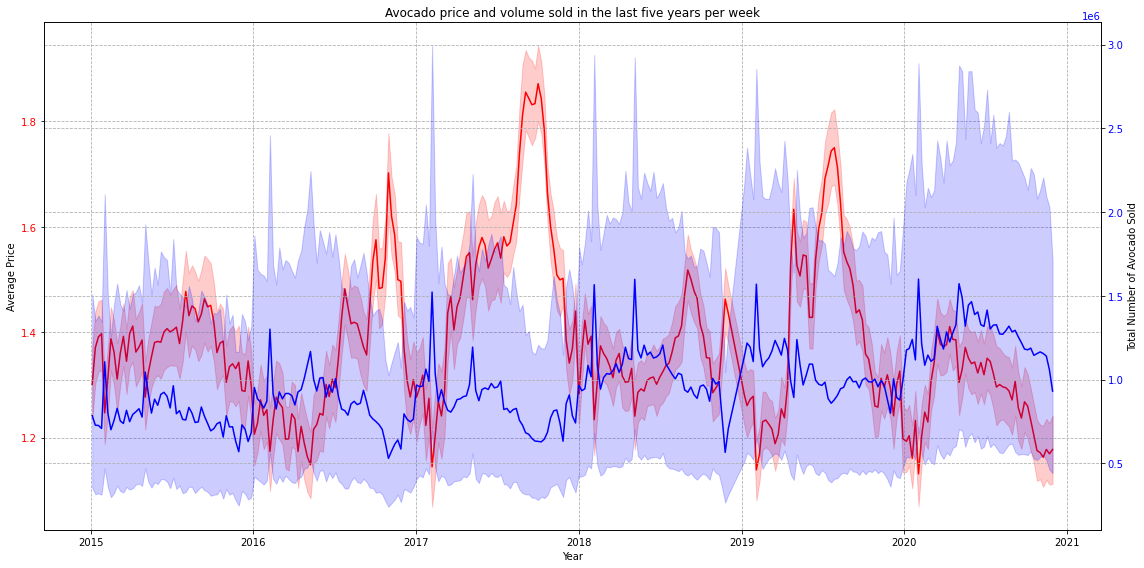

In [17]:
## Trend of avocado price and volume sold in the last five years per week

fig, ax1 = plt.subplots(figsize=(16, 8))

# Sub-plot 1
sns.lineplot(x="date", y="average_price", data=df, color="red", ax=ax1)
ax1.set_xlabel("Year")
ax1.set_ylabel("Average Price")
ax1.set_title("Avocado price and volume sold in the last five years per week")
ax1.tick_params(axis="y", labelcolor="red")
ax1.grid(which="major", axis="both", linestyle="--")

# Sub-plot 2
ax2 = ax1.twinx() # Share same x-axis

sns.lineplot(x="date", y="total_volume", data=df, color="blue", ax=ax2)
ax2.set_ylabel("Total Number of Avocado Sold")
ax2.tick_params(axis="y", labelcolor="blue")
ax2.grid(which="major", axis="both", linestyle="--")

fig.tight_layout()
plt.show()

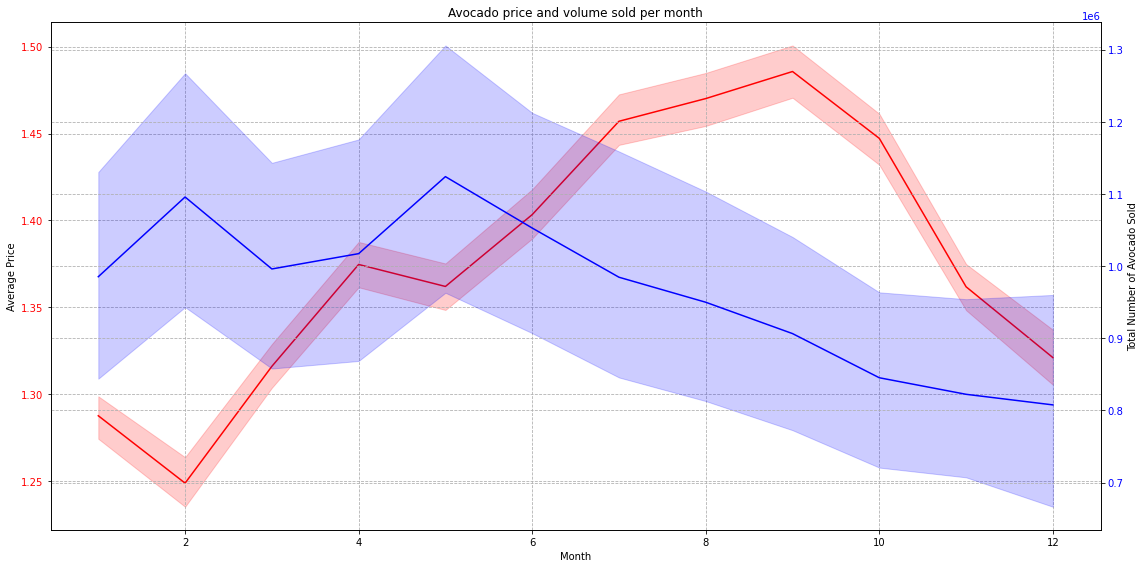

In [18]:
## Trend of avocado price and volume sold per month

fig, ax1 = plt.subplots(figsize=(16, 8))

# Sub-plot 1
sns.lineplot(x="month", y="average_price", data=df, color="red", ax=ax1)
ax1.set_xlabel("Month")
ax1.set_ylabel("Average Price")
ax1.set_title("Avocado price and volume sold per month")
ax1.tick_params(axis="y", labelcolor="red")
ax1.grid(which="major", axis="both", linestyle="--")

# Sub-plot 2
ax2 = ax1.twinx() # Share same x-axis

sns.lineplot(x="month", y="total_volume", data=df, color="blue", ax=ax2)
ax2.set_ylabel("Total Number of Avocado Sold")
ax2.tick_params(axis="y", labelcolor="blue")
ax2.grid(which="major", axis="both", linestyle="--")

fig.tight_layout()
plt.show()

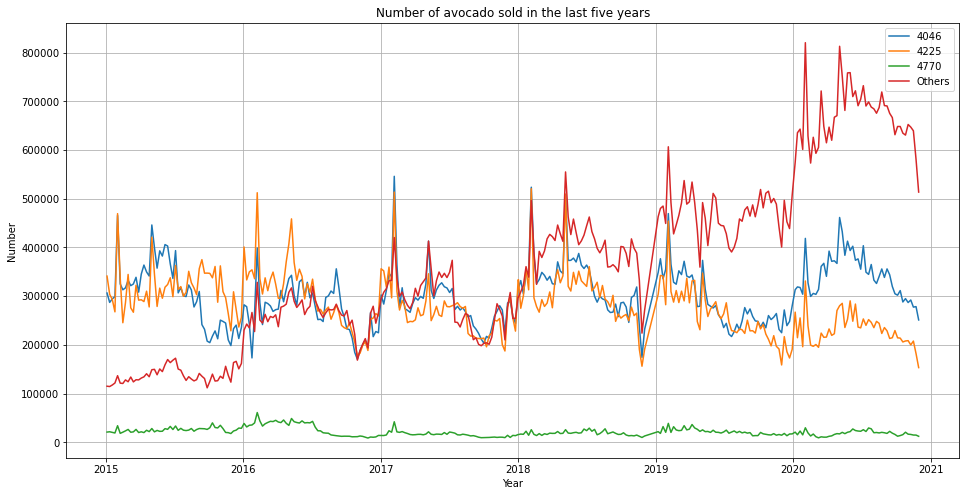

In [19]:
# Group data by "date" to calculate mean
df_gp_date = df.groupby("date").mean()

# Trend of each kind of avocado sold
fig = plt.figure(figsize=(16, 8))

sns.lineplot(x="date", y="4046", data=df_gp_date)
sns.lineplot(x="date", y="4225", data=df_gp_date)
sns.lineplot(x="date", y="4770", data=df_gp_date)
sns.lineplot(x="date", y="other_plu", data=df_gp_date)
plt.legend(["4046", "4225", "4770", "Others"])
plt.title("Number of avocado sold in the last five years")
plt.xlabel("Year")
plt.ylabel("Number")
plt.grid()

plt.show()

,4046,4225,4770,other_plu
year,,,,
2015,1709373493,1760880298,142770033,772196892
2016,1525120178,1672725499,159877854,1463163572
2017,1652035467,1544732027,91215639,1646319842
2018,1721141854,1605290555,98950799,2083157477
2019,1607689936,1461624457,121523875,2631919666
2020,1777073786,1199537141,95541512,3456644548


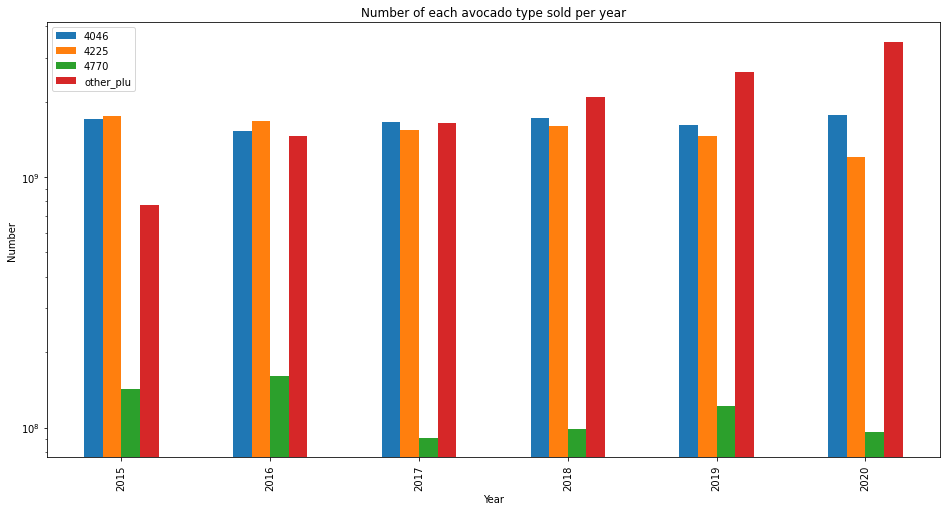

In [20]:
# Group data by "year" to calculate sum
df_gp_year = df.groupby("year")[["4046", "4225", "4770", "other_plu"]].sum()

# Number of each avocado type sold per year
df_gp_year.plot(y=["4046", "4225", "4770", "other_plu"], kind="bar", figsize=(16, 8), logy=True, 
                title="Number of each avocado type sold per year", 
                xlabel="Year", 
                ylabel="Number")

df_gp_year

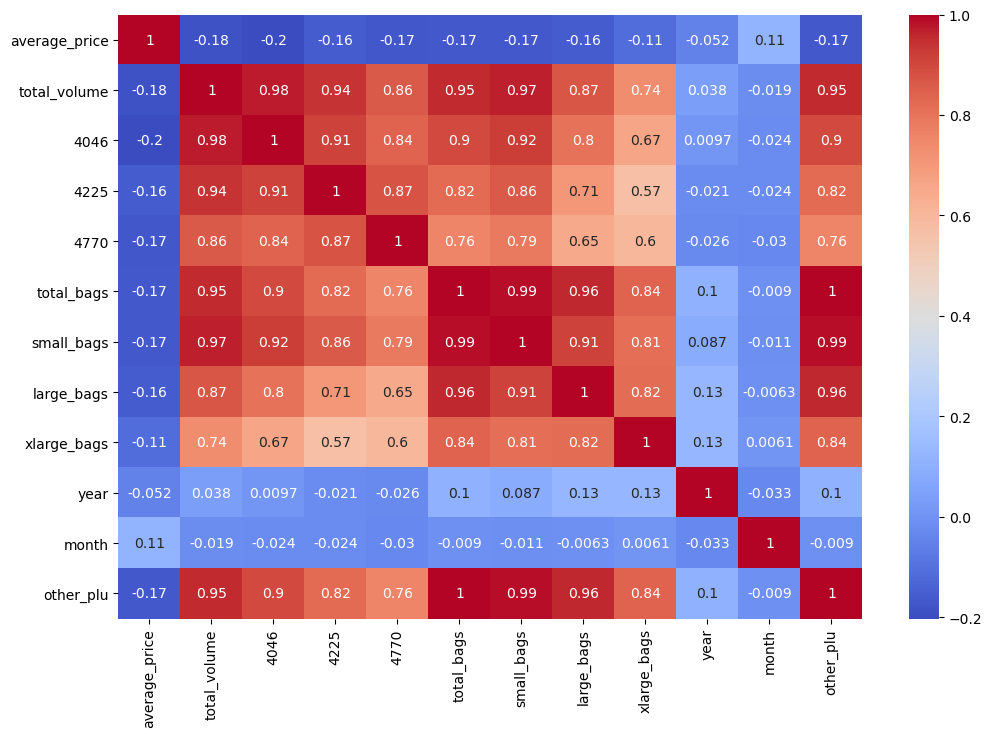

In [21]:
# Correlation Heatmap
corr = df.corr()
plt.figure(figsize=(12,8), dpi= 100)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

___